Current Directory: C:\Users\d7sakar\Documents\weather-monitoring-project\notebooks
✓ Data loaded successfully!
   timestamp_utc    city  temperature_c  feels_like_c  humidity_percent  \
0     1765730334  Riyadh          17.84         17.04                52   
1     1765731960  Riyadh          17.84         17.04                52   
2     1765731960  Riyadh          17.84         17.04                52   
3     1765731960  Riyadh          17.84         17.04                52   
4     1765735441  Riyadh          17.29         16.41                51   

   pressure_hpa  wind_speed_m_s weather_main weather_description  
0          1018            5.59        Clear           clear sky  
1          1018            5.59        Clear           clear sky  
2          1018            5.59        Clear           clear sky  
3          1018            5.59        Clear           clear sky  
4          1018            5.87       Clouds          few clouds  
Training set size: 109
Testing set s

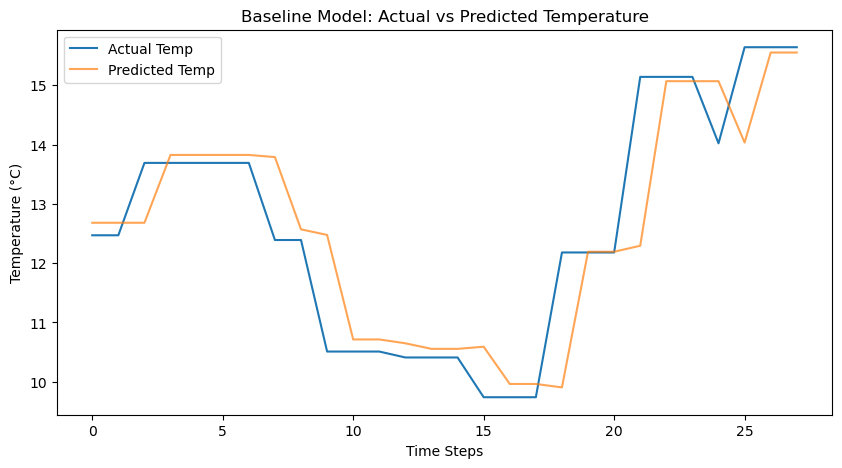

✓ Model saved to ..\models\baseline_model.pkl


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print(f"Current Directory: {os.getcwd()}")

DATA_PATH = os.path.join("..", "data", "raw_weather_data.csv")
MODEL_SAVE_PATH = os.path.join("..", "models", "baseline_model.pkl")


try:
    df = pd.read_csv(DATA_PATH)
    print("✓ Data loaded successfully!")
    print(df.head())
except FileNotFoundError:
    print(f"X Error: Could not find {DATA_PATH}.")
    print("Ensure your notebook is running inside the 'notebooks' directory.")
    # Create dummy data if file is missing just to demonstrate the code
    df = pd.DataFrame({
        'timestamp': pd.date_range(start='2025-01-01', periods=100, freq='H'),
        'temperature': np.random.normal(25, 5, 100),
        'humidity': np.random.normal(60, 10, 100)
    })


df['timestamp'] = pd.to_datetime(df['timestamp_utc'])
df = df.sort_values('timestamp')


df['temp_lag1'] = df['temperature_c'].shift(1)
df = df.dropna() # Remove rows with NaN from shifting

X = df[['temp_lag1', 'humidity_percent']]
y = df['temperature_c']


split_idx = int(len(df) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n--- Model Performance ---")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared Score: {r2:.2f}")

plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual Temp')
plt.plot(y_pred, label='Predicted Temp', alpha=0.7)
plt.title('Baseline Model: Actual vs Predicted Temperature')
plt.xlabel('Time Steps')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

os.makedirs(os.path.dirname(MODEL_SAVE_PATH), exist_ok=True)

joblib.dump(model, MODEL_SAVE_PATH)
print(f"✓ Model saved to {MODEL_SAVE_PATH}")